# Importando base de dados


In [25]:
import pandas as pd 
import seaborn as sns 

In [2]:
dados = pd.read_csv('data/tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo Colunas e campos

In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'
}

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
gorjetas = dados.rename(columns=renomear)

In [8]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No': 'Não', 
    'Yes' : 'Sim'

}


In [11]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [14]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
dias = {

    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}

In [16]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [17]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [18]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [19]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [20]:
horario = {
    'Dinner':'Jantar',
     'Lunch':'Almoço'
}

In [21]:
gorjetas.hora_do_dia.map(horario)

0      Jantar
1      Jantar
2      Jantar
3      Jantar
4      Jantar
        ...  
239    Jantar
240    Jantar
241    Jantar
242    Jantar
243    Jantar
Name: hora_do_dia, Length: 244, dtype: object

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(horario)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [26]:
sns.__version__

'0.11.0'

# Análise 1 - valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

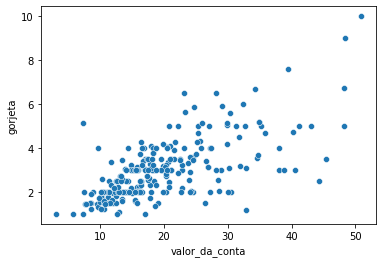

In [53]:
grafico_valor_gorjeta = sns.scatterplot(x = 'valor_da_conta',y = 'gorjeta', data= gorjetas)

**Visualmente, O valor da gorjeta aumenta conforme aumenta o valor da conta **

In [39]:
print(f'A base de dados contem {gorjetas.shape[0]} de registros \n')
print(f'Registros não nulos \n\n{gorjetas.count()}')


A base de dados contem 244 de registros 

Registros não nulos 

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64


## Criando o campo porcentagem

In [40]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [46]:
gorjetas['porcentagem'] =  gorjetas.gorjeta/gorjetas.valor_da_conta

In [47]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [48]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2) # Arredondando

In [49]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


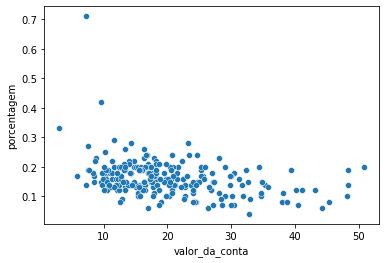

In [52]:
grafico_porcentagem_conta = sns.scatterplot(x ='valor_da_conta', y = 'porcentagem', data= gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta **

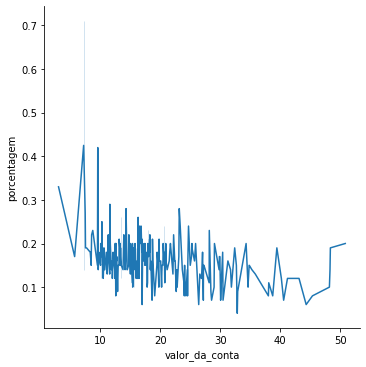

In [55]:
grafico_porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data= gorjetas, kind='line')

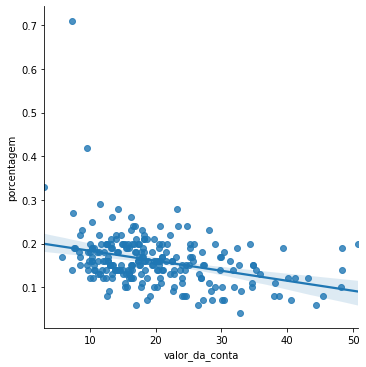

In [56]:
sns.lmplot(x='valor_da_conta', y ='porcentagem', data=gorjetas)